In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('Stress-Lysis.csv')
data.head()

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,97.87,200,0


Data Preparation

In [4]:
data.shape

(2001, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Humidity,2001.0,20.000000,5.777833,10.0,15.00,20.00,25.00,30.0
Temperature,2001.0,89.008996,5.777623,79.0,84.01,89.01,94.01,99.0
Step_count,2001.0,100.868066,65.987018,0.0,50.00,101.00,151.00,1490.0
Stress_Level,2001.0,1.102449,0.771362,0.0,0.00,1.00,2.00,2.0


In [7]:
data.isnull().sum()

Humidity        0
Temperature     0
Step_count      0
Stress_Level    0
dtype: int64

In [8]:
data.duplicated().sum()

0

Exploratory Data Analysis

In [9]:
data['Stress_Level'].unique()

array([1, 2, 0], dtype=int64)

In [10]:
data['Stress_Level'].value_counts()

1    790
2    708
0    503
Name: Stress_Level, dtype: int64

In [11]:
data.skew()

Humidity        1.179993e-18
Temperature    -8.894970e-04
Step_count      4.640380e+00
Stress_Level   -1.776367e-01
dtype: float64

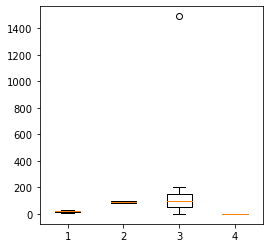

In [12]:
plt.figure(figsize=(4,4))
plt.boxplot(data)
plt.show()

In [13]:
# Transformasi Logaritma
hum_log = np.log(data['Humidity'])
humadity = round(hum_log.skew(), 10)

print(humadity)

-0.3790364332


In [14]:
# Transformasi SquareRoot
temp_sqrt = np.sqrt(data['Temperature'])
temp_sqrt.skew()

temperature = round(temp_sqrt.skew(), 10)
print(temperature)

-0.0399720007


In [15]:
Q1 = data['Step_count'].quantile(0.25)
Q2 = data['Step_count'].quantile(0.75)

In [16]:
Q1

50.0

In [17]:
Q2

151.0

In [18]:
data['Step_count'] = np.where(data['Step_count']<Q1, Q1, data['Step_count'])
data['Step_count'] = np.where(data['Step_count']>Q2, Q2, data['Step_count'])

In [19]:
step_count = round(data['Step_count'].skew(), 10)
print(step_count)

-0.0017934111


In [20]:
# Transformasi SquareRoot
stress_sqrt = np.sqrt(data['Stress_Level'])
SL = round(stress_sqrt.skew(), 10)

print(SL)

-0.7898515218


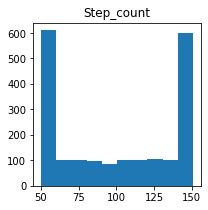

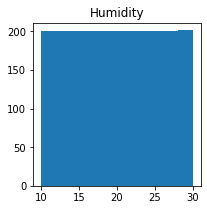

In [21]:
column=['Step_count','Humidity']
for category in column:
    plt.figure(figsize=(3,3))
    plt.hist(data[category])
    plt.title(category)
    plt.show()

<AxesSubplot:xlabel='Stress_Level', ylabel='Count'>

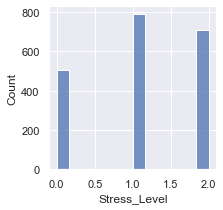

In [22]:
plt.figure(figsize=(3,3))
sns.set(font_scale=1)
sns.histplot(data=data, x='Stress_Level')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

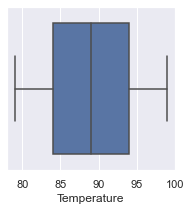

In [23]:
plt.figure(figsize=(3,3))
sns.boxplot(data['Temperature'])

Korelasi/Correlation

In [24]:
corr = data.corr()
corr

,Humidity,Temperature,Step_count,Stress_Level
Humidity,1.000000,0.997575,0.900736,0.931773
Temperature,0.997575,1.000000,0.902675,0.929580
Step_count,0.900736,0.902675,1.000000,0.854995
Stress_Level,0.931773,0.929580,0.854995,1.000000


<AxesSubplot:>

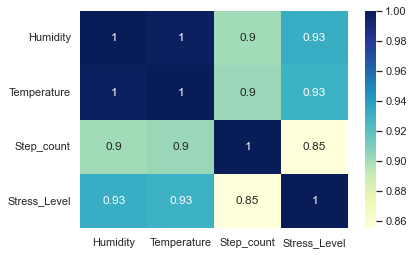

In [25]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

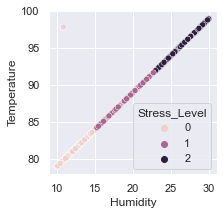

In [26]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='Humidity',y='Temperature',hue='Stress_Level',data=data)
plt.show()

Pre Modelling

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x = data.drop(columns='Stress_Level')
y = data['Stress_Level']

In [29]:
x.head()

,Humidity,Temperature,Step_count
0,21.33,90.33,123.0
1,21.41,90.41,93.0
2,27.12,96.12,151.0
3,27.64,96.64,151.0
4,10.87,97.87,151.0


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [31]:
x_train.shape

(1500, 3)

In [32]:
x_test.shape

(501, 3)

Modelling

In [33]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
y_pred = regressor.predict(x_test)

In [36]:
y_pred

array([0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1,
       2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0,
       1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0,
       1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2,
       2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0,
       1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2,
       0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2,

In [37]:
print(confusion_matrix(y_test, y_pred))

[[126   2   0]
 [  0 190   0]
 [  0   0 183]]


In [38]:
print(accuracy_score(y_test,y_pred))

0.9960079840319361


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       128
           1       0.99      1.00      0.99       190
           2       1.00      1.00      1.00       183

    accuracy                           1.00       501
   macro avg       1.00      0.99      1.00       501
weighted avg       1.00      1.00      1.00       501



SVM Model

In [40]:
from sklearn.svm import SVC

In [41]:
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [42]:
y_pred1 = classifier.predict(x_test)

In [43]:
y_pred1

array([0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1,
       2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0,
       1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0,
       1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2,
       2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0,
       1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2,
       0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2,

In [44]:
print(accuracy_score(y_test, y_pred1))

1.0


In [45]:
print(confusion_matrix(y_test, y_pred1))

[[128   0   0]
 [  0 190   0]
 [  0   0 183]]


In [46]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       183

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501



Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [48]:
print(accuracy_score(y_test, prediction))

1.0


Save Model Random Forest

In [49]:
import pickle

In [50]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [51]:
filename = 'stress_trained.sav'
pickle.dump(classifier,open(filename,'wb'))

Simple Prediction

In [52]:
input_data = (11.05,80.05,14) 

id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")

[0]
Stress Level: LOW


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
